In [1]:
# Imports
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from pathlib import Path

import pickle

In [2]:
pkl_path = "../final_artifacts/merge_cfb_ref_pfb_ref_output.pkl"
with open(pkl_path, 'rb') as f:
    df = pickle.load(f)

display(f'rows : {len(df)}; cols: {len(df.columns)}')

display(len(df))

x=10
display(df.iloc[:,:x].head())
display(df.iloc[:,x:].head())

'rows : 540; cols: 27'

540

,player,G,Cmp,Att,Cmp%,Yds,TD,TD%,Int,Int%
0,Greg Cook,29,332,655,50.7,4906,34,5.2,35,5.3
1,Marty Domres,27,368,702,52.4,4492,24,3.4,38,5.4
2,Terry Hanratty,29,304,550,55.3,4152,27,4.9,34,6.2
3,Bobby Douglass,30,183,379,48.3,2817,20,5.3,20,5.3
4,Al Woodall,20,118,221,53.4,1501,4,1.8,13,5.9


,Y/A,AY/A,Y/C,Y/G,Rate,ht_in,wt,college,draft_yr,round,pick,nfl_success,win_success,stats_success,metrics_success,longevity_success,superbowl_success
0,7.5,6.12,14.8,169.2,120.0,76.0,220.0,Cincinnati,1969,1,5,0,0,0,0,0,0
1,6.4,4.65,12.2,166.4,106.6,76.0,220.0,Columbia,1969,1,9,0,0,0,0,1,0
2,7.5,5.75,13.7,143.2,122.5,73.0,210.0,Notre Dame,1969,2,30,0,0,0,0,0,1
3,7.4,6.11,15.4,93.9,117.6,76.0,225.0,Kansas,1969,2,41,0,0,0,0,1,0
4,6.8,4.51,12.7,75.1,104.7,77.0,205.0,Duke,1969,2,52,0,0,0,0,0,0


### 1) Investigate Data
### 2) Handle NA Values: Use techniques like 
###        a. fill or remove NA values using SimpleImputer 
### 3) Compute Correlation Matrix: On the cleaned DataFrame.
### 4) Standard Scaling: Apply StandardScaler to ensure your features are on the same scale.
### 5) Train-Test Split: To prepare your data for model training and evaluation.
### 6) Model with Neural Networks


By handling the NA values first, we ensure the correlation matrix reflects the true relationships between complete data points. 
Doing it before scaling keeps the original values intact for a more accurate correlation matrix.

### 1) Investigate Data

In [3]:
# display(df.info())
# x=17
# display(df.iloc[:,:x].head())
# display(df.iloc[:,x:].head())
display(df.columns)
df.rename(columns={'Rate': 'Pass_Eff_Rate'}, inplace=True)
cols_to_drop =  ['player', 'college', 'draft_yr']
df.drop(columns=cols_to_drop, inplace=True)


filtered_df = df.iloc[:,:21]
filtered_df.head()

display(filtered_df.head())
# display(filtered_df.iloc[:,:x].head())
# display(filtered_df.iloc[:,x:].head())
display(filtered_df.columns)

Index(['player', 'G', 'Cmp', 'Att', 'Cmp%', 'Yds', 'TD', 'TD%', 'Int', 'Int%',
       'Y/A', 'AY/A', 'Y/C', 'Y/G', 'Rate', 'ht_in', 'wt', 'college',
       'draft_yr', 'round', 'pick', 'nfl_success', 'win_success',
       'stats_success', 'metrics_success', 'longevity_success',
       'superbowl_success'],
      dtype='object')

,G,Cmp,Att,Cmp%,Yds,TD,TD%,Int,Int%,Y/A,...,Y/C,Y/G,Pass_Eff_Rate,ht_in,wt,round,pick,nfl_success,win_success,stats_success
0,29,332,655,50.7,4906,34,5.2,35,5.3,7.5,...,14.8,169.2,120.0,76.0,220.0,1,5,0,0,0
1,27,368,702,52.4,4492,24,3.4,38,5.4,6.4,...,12.2,166.4,106.6,76.0,220.0,1,9,0,0,0
2,29,304,550,55.3,4152,27,4.9,34,6.2,7.5,...,13.7,143.2,122.5,73.0,210.0,2,30,0,0,0
3,30,183,379,48.3,2817,20,5.3,20,5.3,7.4,...,15.4,93.9,117.6,76.0,225.0,2,41,0,0,0
4,20,118,221,53.4,1501,4,1.8,13,5.9,6.8,...,12.7,75.1,104.7,77.0,205.0,2,52,0,0,0


Index(['G', 'Cmp', 'Att', 'Cmp%', 'Yds', 'TD', 'TD%', 'Int', 'Int%', 'Y/A',
       'AY/A', 'Y/C', 'Y/G', 'Pass_Eff_Rate', 'ht_in', 'wt', 'round', 'pick',
       'nfl_success', 'win_success', 'stats_success'],
      dtype='object')

In [4]:
df['nfl_success'].value_counts()

0    383
1    157
Name: nfl_success, dtype: int64

In [5]:
# Set x feature data to be the College Football statistical data 
# Set the aggregate nfl_success to be the y target data

y = df['nfl_success']
X = filtered_df
X.columns

Index(['G', 'Cmp', 'Att', 'Cmp%', 'Yds', 'TD', 'TD%', 'Int', 'Int%', 'Y/A',
       'AY/A', 'Y/C', 'Y/G', 'Pass_Eff_Rate', 'ht_in', 'wt', 'round', 'pick',
       'nfl_success', 'win_success', 'stats_success'],
      dtype='object')

In [6]:
df[['G', 'Cmp', 'Att', 'Cmp%', 'Yds', 'TD', 'TD%', 'Int', 'Int%', 'Y/A',
       'AY/A', 'Y/C', 'Y/G', 'Pass_Eff_Rate', 'ht_in', 'wt', 'round', 'pick',
       'nfl_success'
       ]].head()

,G,Cmp,Att,Cmp%,Yds,TD,TD%,Int,Int%,Y/A,AY/A,Y/C,Y/G,Pass_Eff_Rate,ht_in,wt,round,pick,nfl_success
0,29,332,655,50.7,4906,34,5.2,35,5.3,7.5,6.12,14.8,169.2,120.0,76.0,220.0,1,5,0
1,27,368,702,52.4,4492,24,3.4,38,5.4,6.4,4.65,12.2,166.4,106.6,76.0,220.0,1,9,0
2,29,304,550,55.3,4152,27,4.9,34,6.2,7.5,5.75,13.7,143.2,122.5,73.0,210.0,2,30,0
3,30,183,379,48.3,2817,20,5.3,20,5.3,7.4,6.11,15.4,93.9,117.6,76.0,225.0,2,41,0
4,20,118,221,53.4,1501,4,1.8,13,5.9,6.8,4.51,12.7,75.1,104.7,77.0,205.0,2,52,0


In [7]:
nan_counts = X.isna().sum()
print(len(X))
print(X.info())
print(nan_counts)

540
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 540 entries, 0 to 539
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   G              540 non-null    object 
 1   Cmp            540 non-null    object 
 2   Att            540 non-null    object 
 3   Cmp%           540 non-null    object 
 4   Yds            540 non-null    object 
 5   TD             540 non-null    object 
 6   TD%            540 non-null    object 
 7   Int            540 non-null    object 
 8   Int%           540 non-null    object 
 9   Y/A            540 non-null    object 
 10  AY/A           540 non-null    object 
 11  Y/C            540 non-null    object 
 12  Y/G            540 non-null    object 
 13  Pass_Eff_Rate  540 non-null    object 
 14  ht_in          540 non-null    Float64
 15  wt             539 non-null    Float64
 16  round          540 non-null    Int64  
 17  pick           540 non-null    Int64  
 18  nfl_su

### 2) Handle NA Values
### use SimpleImputer to fill in the couple of  NA values (mean strategy)
+ can use SimpleImputer (from sklearn) or Fill na with 0.

In [8]:
from sklearn.impute import SimpleImputer

# Convert all data to numeric, forcing errors to NaN
X = X.apply(pd.to_numeric, errors='coerce')

# Initialize the SimpleImputer with mean strategy
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the DataFrame and transform it
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

print(X_imputed[:10])

# # replace NaN with 0
# X0 = X.fillna(0)

      G    Cmp    Att  Cmp%     Yds    TD   TD%   Int  Int%  Y/A  ...   Y/C  \
0  29.0  332.0  655.0  50.7  4906.0  34.0   5.2  35.0   5.3  7.5  ...  14.8   
1  27.0  368.0  702.0  52.4  4492.0  24.0   3.4  38.0   5.4  6.4  ...  12.2   
2  29.0  304.0  550.0  55.3  4152.0  27.0   4.9  34.0   6.2  7.5  ...  13.7   
3  30.0  183.0  379.0  48.3  2817.0  20.0   5.3  20.0   5.3  7.4  ...  15.4   
4  20.0  118.0  221.0  53.4  1501.0   4.0   1.8  13.0   5.9  6.8  ...  12.7   
5  30.0  166.0  404.0  41.1  1937.0   7.0   1.7  19.0   4.7  4.8  ...  11.7   
6  27.0  148.0  280.0  52.9  2327.0  30.0  10.7  20.0   7.1  8.3  ...  15.7   
7  30.0  235.0  444.0  52.9  3940.0  23.0   5.2  23.0   5.2  8.9  ...  16.8   
8  30.0  207.0  370.0  55.9  2432.0  16.0   4.3  21.0   5.7  6.6  ...  11.7   
9  30.0  180.0  303.0  59.4  2196.0  18.0   5.9  18.0   5.9  7.2  ...  12.2   

     Y/G  Pass_Eff_Rate  ht_in     wt  round   pick  nfl_success  win_success  \
0  169.2          120.0   76.0  220.0    1.0    5

once you've handled missing data using SimpleImputer and have your imputed dataset (X_imputed), 
the next logical steps are to:
 apply scaling (with StandardScaler) and then 
 split the dataset into training and testing sets using train_test_split.

### 4) Train-Test Split

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

In [10]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler instance
X_scaler = StandardScaler()
# Fit the Standard Scaler with the training data 
X_scaler.fit(X_train)
# Scale the TRAINING DATA and TEST DATA SEPARATELY with the Transform Function
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Neural Network Model

In [11]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

In [12]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
import matplotlib.pyplot as plt

MLPRegressor is a machine learning model that stands for Multilayer Perceptron Regressor. It's a part of scikit-learn's neural_network module and is used for regression tasks.

It’s an artificial neural network that maps input data to continuous output values, suitable for regression problems.

Architecture: Consists of multiple layers of nodes, each connected to the next layer, allowing it to model complex relationships.
Activation Functions: Uses functions like ReLU, Tanh, or Sigmoid to introduce non-linearity.
Preprocessing: Data should be scaled before using MLPRegressor, as it is sensitive to feature scaling.
Hyperparameters: Includes options like hidden_layer_sizes, activation, and solver to fine-tune the model

In [13]:
mlp = MLPRegressor(
    hidden_layer_sizes=(100,),  # One hidden layer with 100 neurons
    activation='relu',
    solver='adam',
    alpha=0.0001,               # L2 penalty (regularization term)
    learning_rate='constant',
    learning_rate_init=0.001,
    max_iter=200,
    random_state=42
)
mlp.fit(X_train, y_train)

c:\Users\black\anaconda3\envs\tensorflow_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(random_state=42)

In [14]:
# Predict with model
y_pred = mlp.predict(X_test)

In [22]:
# Evaluate w/ Mean Squared Error (MSE) and R2 Score
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R2 Score: {r2:.2f}')





Mean Squared Error: 13.63
R2 Score: -64.38


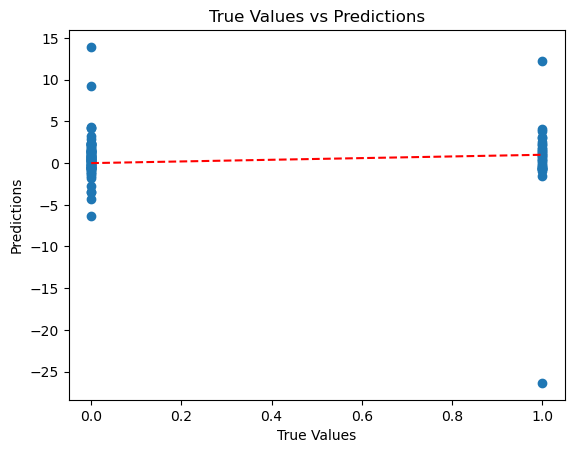

In [16]:
# Visualize Predictions
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True Values vs Predictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Line for reference
plt.show()

In [18]:
# Use GridSearchCV to find the best hyperparameters
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (100, 50), (50, 25)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate_init': [0.001, 0.01],
}
grid_search = GridSearchCV(
    MLPRegressor(max_iter=200, random_state=42),
    param_grid,
    cv=3,
    scoring='r2',
    n_jobs=-1,
)
grid_search.fit(X_train, y_train)
print(f'Best Parameters: {grid_search.best_params_}')
best_mlp = grid_search.best_estimator_

Best Parameters: {'activation': 'tanh', 'alpha': 0.01, 'hidden_layer_sizes': (50, 25), 'learning_rate_init': 0.001, 'solver': 'adam'}


In [19]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'hidden_layer_sizes': [(100,), (50, 50), (150,)],
    'activation': ['relu', 'tanh'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate_init': [0.001, 0.01]
}

grid_search = GridSearchCV(MLPRegressor(max_iter=200, random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print(f'Best Parameters: {grid_search.best_params_}')


c:\Users\black\anaconda3\envs\tensorflow_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\black\anaconda3\envs\tensorflow_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\black\anaconda3\envs\tensorflow_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\black\anaconda3\envs\tensorflow_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warning

Best Parameters: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50), 'learning_rate_init': 0.001}


Best Parameters: {'activation': 'tanh', 'alpha': 0.01, 'hidden_layer_sizes': (50, 25), 'learning_rate_init': 0.001, 'solver': 'adam'}

Best Parameters: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50), 'learning_rate_init': 0.001}



In [20]:
# using best parameters, retrain model with new values:

best_params = {
    'hidden_layer_sizes': (50, 50),
    'activation': 'tanh',
    'alpha': 0.0001,
    'learning_rate_init': 0.001,
    'max_iter': 200,
    'random_state': 42
}

mlp_best = MLPRegressor(**best_params)
mlp_best.fit(X_train, y_train)


MLPRegressor(activation='tanh', hidden_layer_sizes=(50, 50), random_state=42)

In [24]:
# Evaluate Retrained Model w/ MSE and R2

y_pred_best = mlp_best.predict(X_test)
mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

print(f'Best Model Mean Squared Error: {mse_best:.2f}')
print(f'Best Model R2 Score: {r2_best:.2f}')


Best Model Mean Squared Error: 0.22
Best Model R2 Score: -0.05


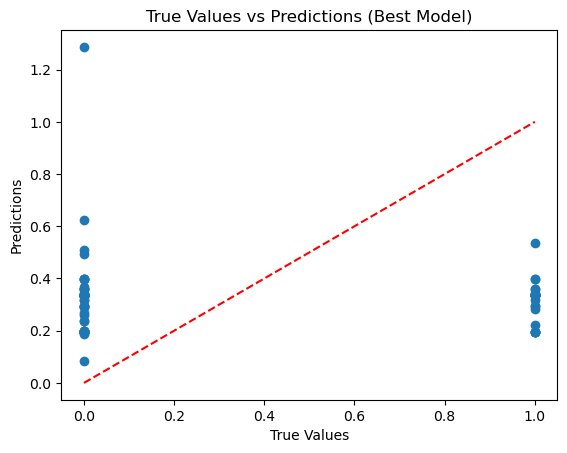

In [25]:
# Visualize Predictions with Retrained model

plt.scatter(y_test, y_pred_best)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True Values vs Predictions (Best Model)')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Line for reference
plt.show()
